In [14]:
#读取mysql的视图获取数据，再用图表进行展示
import pandas as pd
import pymysql
import matplotlib.pyplot as plt

db = pymysql.connect(host="localhost", user="root",password="12345678", db="xueqiustock", port=3306,charset='utf8')
cursor = db.cursor()
code= "SZ300104"

sql = "select zcfzb.date as date, "\
    "lrb.sdsfy/lrb.lrze as sdsl, "\
    "cwzb.operrevenue/lrb.jlr as xjllb, "\
    "cwzb.mainbusincgrowrate as xszzl, "\
    "cwzb.netincgrowrate as lrzzl, "\
    "cwzb.salegrossprofitrto as xsmll," \
    "lrb.yyzsr/zcfzb.zczj as zzczzl,lrb.yyzcb/zcfzb.ch as chzzl," \
    "lrb.yyzsr/(zcfzb.yszk+zcfzb.yspj+zcfzb.yfkx) as yszkzzl,"\
    "zcfzb.hbzj/zcfzb.zczj as xjbl, "\
    "zcfzb.fldzchj/zcfzb.zczj as fldzc," \
    "zcfzb.fzhj/zcfzb.zczj as zcfzl,"\
    "(zcfzb.sy+zcfzb.cqdtfy)/zcfzb.ldzchj as syzb,"\
    "(zcfzb.yfzk+zcfzb.yskx)/zcfzb.fzhj as wxfz,"\
    "lrb.jlr/zcfzb.syzqy as roe "\
    "from(select * from t_zcfzb z " \
    "where z.`code` = '" + code +"') as zcfzb,"\
    "(select * from t_lrb l "\
    "where l.`code` = '" + code + "') as lrb,"\
    "(select * from t_cwzb c "\
    "where c.`code` = '" + code + "') as cwzb "\
    "where zcfzb.date = lrb.date and zcfzb.date = cwzb.date "\
    "and month(zcfzb.date) = 12"

In [15]:
try:  
    cursor.execute(sql)    #执行sql语句  
  
    results = cursor.fetchall()    #获取查询的所有记录    
    df = pd.DataFrame(list(results))
except Exception as e:  
    raise e  
finally:  
    db.close()  #关闭连接  
    
df = df.set_index([0])

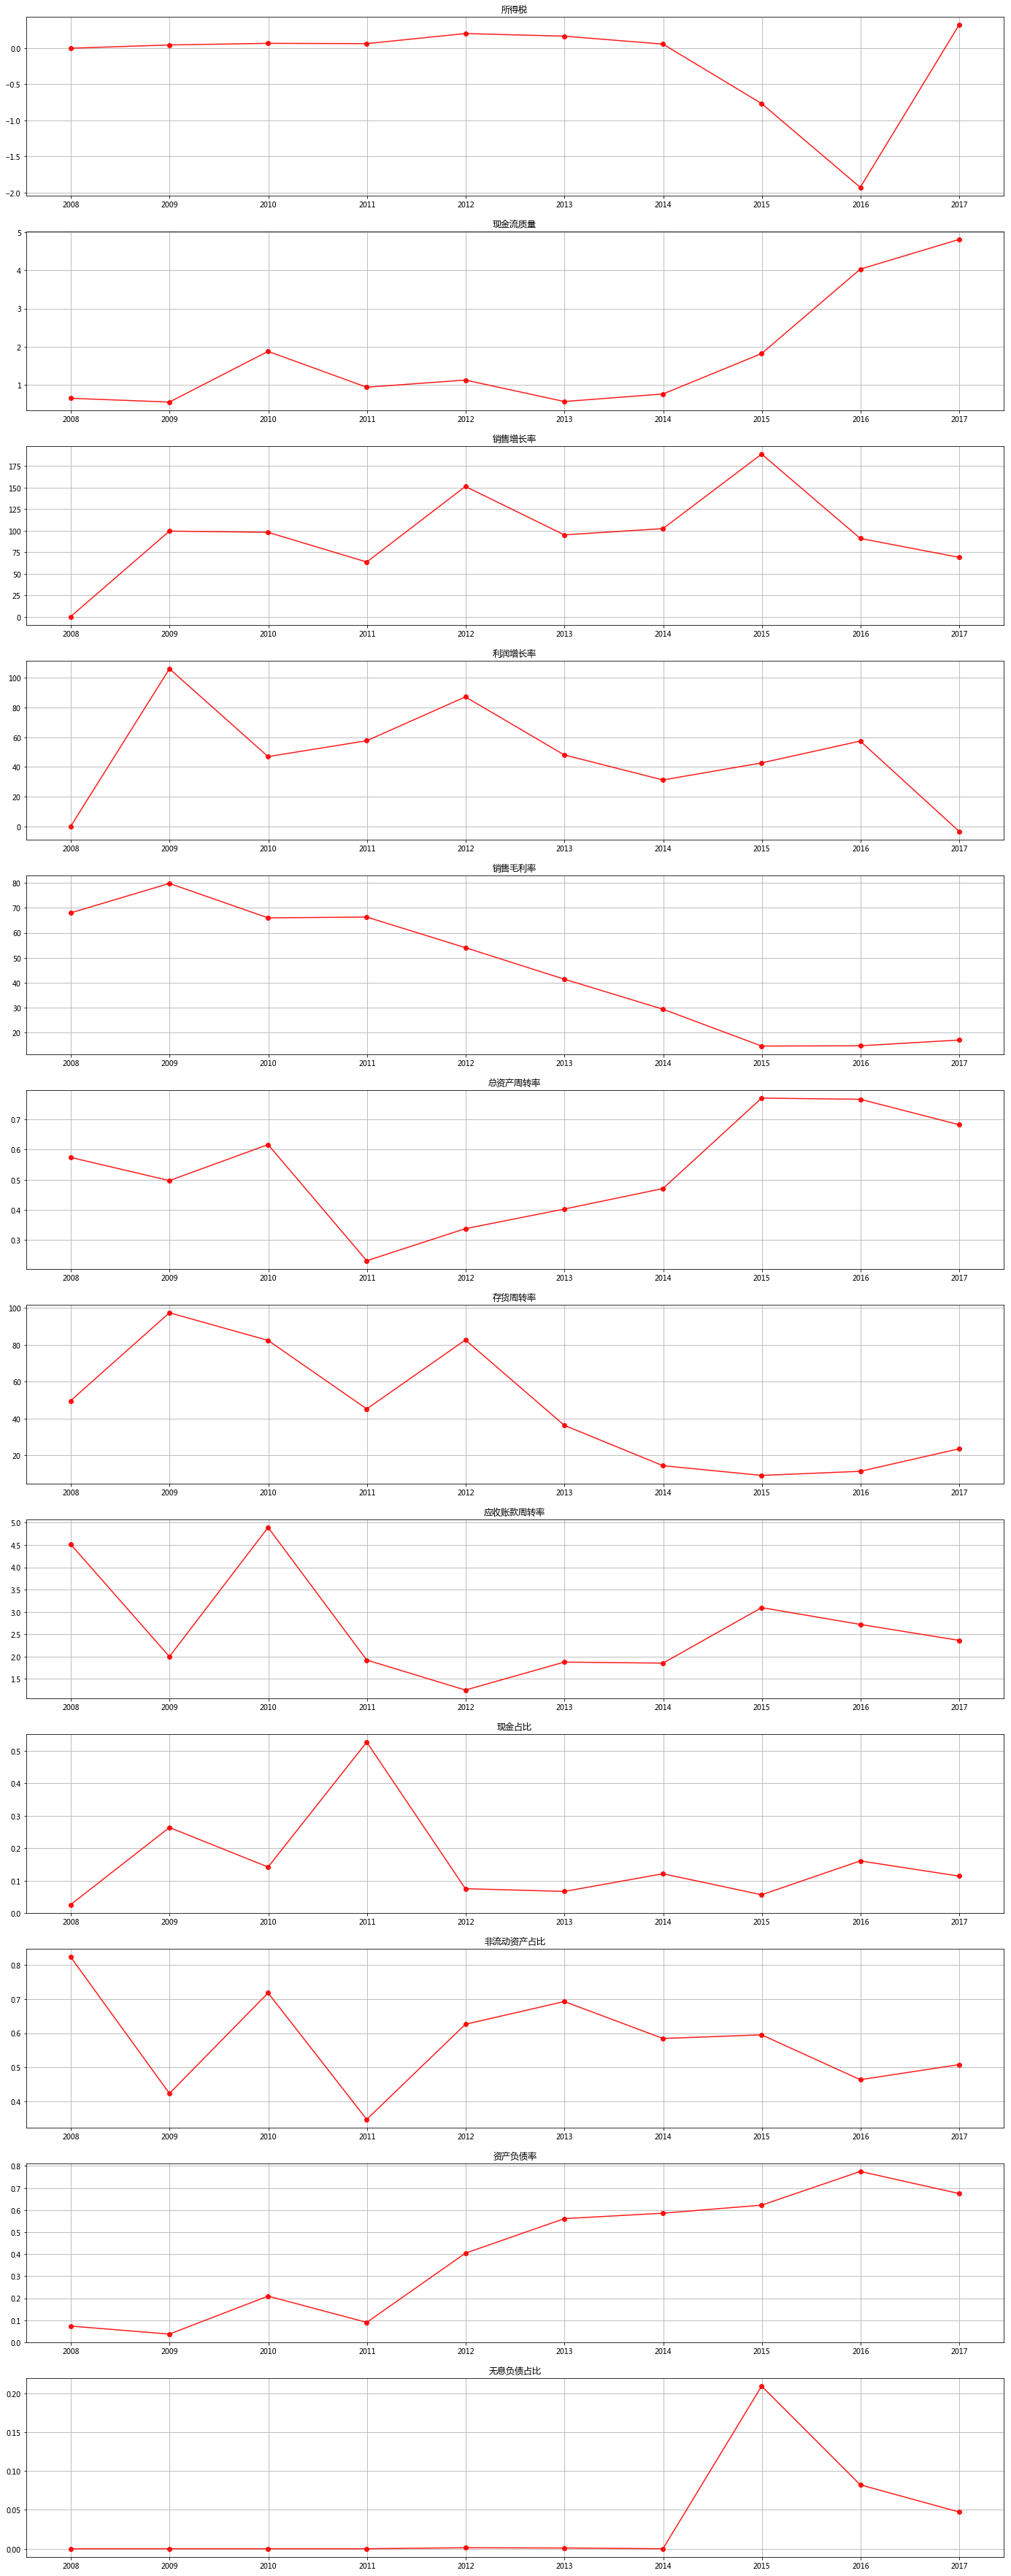

In [16]:

fig_q2 = plt.figure(figsize = (24,64))
# 创建一个图表，大小为12*16

ax1 = fig_q2.add_subplot(12,1,1)
ax2 = fig_q2.add_subplot(12,1,2)
ax3 = fig_q2.add_subplot(12,1,3)
ax4 = fig_q2.add_subplot(12,1,4)
ax5 = fig_q2.add_subplot(12,1,5)
ax6 = fig_q2.add_subplot(12,1,6)
ax7 = fig_q2.add_subplot(12,1,7)
ax8 = fig_q2.add_subplot(12,1,8)
ax9 = fig_q2.add_subplot(12,1,9)
ax10 = fig_q2.add_subplot(12,1,10)
ax11 = fig_q2.add_subplot(12,1,11)
ax12 = fig_q2.add_subplot(12,1,12)
#ax13 = fig_q2.add_subplot(4,3,13)

#所得税
ax1.plot(df[1],color = 'r',marker = 'o',alpha=0.9)
ax1.set_title('所得税')
ax1.grid(True)
#现金流质量
ax2.plot(df[2],color = 'r',marker = 'o',alpha=0.9)
ax2.set_title('现金流质量')
ax2.grid(True)
#销售增长率
ax3.plot(df[3],color = 'r',marker = 'o',alpha=0.9)
ax3.set_title('销售增长率')
ax3.grid(True)
#利润增长率
ax4.plot(df[4],color = 'r',marker = 'o',alpha=0.9)
ax4.set_title('利润增长率')
ax4.grid(True)
#销售毛利率
ax5.plot(df[5],color = 'r',marker = 'o',alpha=0.9)
ax5.set_title('销售毛利率')
ax5.grid(True)
#总资产周转率
ax6.plot(df[6],color = 'r',marker = 'o',alpha=0.9)
ax6.set_title('总资产周转率')
ax6.grid(True)
#存货周转率
ax7.plot(df[7],color = 'r',marker = 'o',alpha=0.9)
ax7.set_title('存货周转率')
ax7.grid(True)
#应收账款周转率
ax8.plot(df[8],color = 'r',marker = 'o',alpha=0.9)
ax8.set_title('应收账款周转率')
ax8.grid(True)
#现金占比
ax9.plot(df[9],color = 'r',marker = 'o',alpha=0.9)
ax9.set_title('现金占比')
ax9.grid(True)
#非流动资产占比
ax10.plot(df[10],color = 'r',marker = 'o',alpha=0.9)
ax10.set_title('非流动资产占比')
ax10.grid(True)
#资产负债率
ax11.plot(df[11],color = 'r',marker = 'o',alpha=0.9)
ax11.set_title('资产负债率')
ax11.grid(True)
#商誉占比
#ax11.plot(df[12],color = 'r',marker = 'o',alpha=0.9)
#ax11.set_title('商誉')
#ax11.grid(True)
#无息负债占比
ax12.plot(df[12],color = 'r',marker = 'o',alpha=0.9)
ax12.set_title('无息负债占比')
ax12.grid(True)
#净资产收益率
#ax13.plot(df[[0,13]],color = 'r',marker = 'o',alpha=0.9)
#ax13.set_title('净资产收益率')
#ax13.grid(True)
plt.show()